In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from luwiji.logistic_regression import illustration

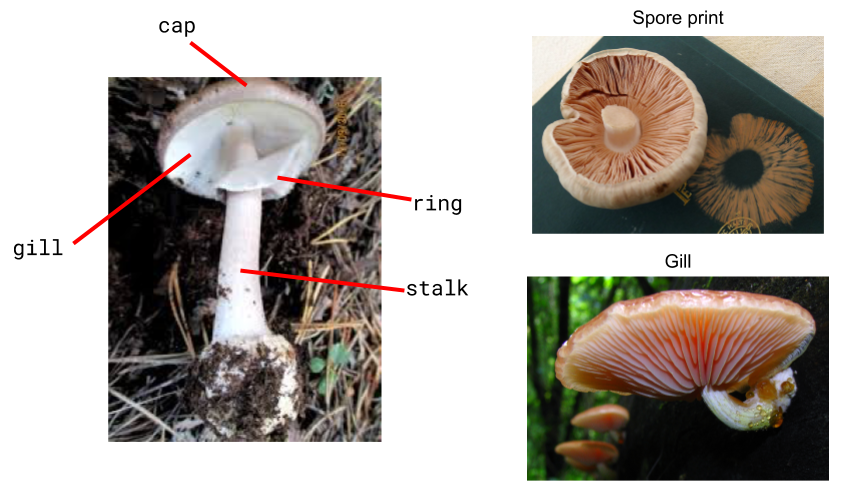

In [7]:
illustration.mushroom

# Import Data

In [5]:
pd.options.display.max_columns = 100

In [8]:
df = pd.read_csv("data/mushrooms.csv")
df.head(50)

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
5,True,convex,scaly,yellow,True,almond,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,black,numerous,grasses
6,True,bell,smooth,white,True,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,black,numerous,meadows
7,True,bell,scaly,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,scattered,meadows
8,False,convex,scaly,white,True,pungent,free,close,narrow,pink,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,several,grasses
9,True,bell,smooth,yellow,True,almond,free,close,broad,gray,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,meadows


#### plot missing values

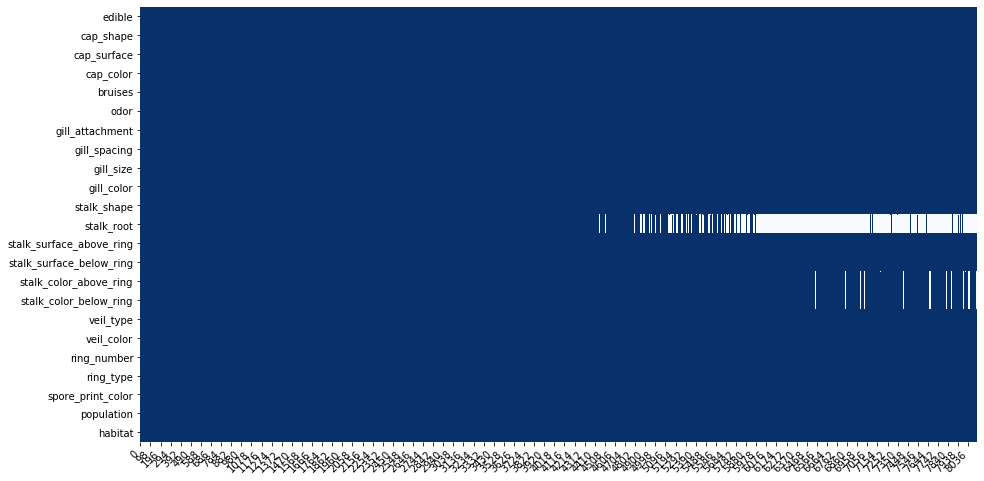

In [9]:
plot_missing_value(df)

In [10]:
df.drop(columns="stalk_root", inplace=True)

In [12]:
df.edible.value_counts(normalize=True)

True     0.517971
False    0.482029
Name: edible, dtype: float64

# Tips Klasifikasi: Association Matrix
klasifikasi tidak ada korelasi, tapi adanya Matriks Asosiasi

In [13]:
from jcopml.plot import plot_association_matrix

In [14]:
plot_association_matrix(df, "edible")

ValueError: Categorical column should have at least 2 category
You should remove these column from your data -> veil_type

In [15]:
# veil type hanya punya 1 kategori jadi dianggap bukan data, maka harus didrop
df.drop(columns="veil_type", inplace=True)

In [16]:
plot_association_matrix(df, "edible")

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

# Dataset Splitting

In [17]:
X = df.drop(columns="edible")
y = df.edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 20), (1625, 20), (6499,), (1625,))

# Training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Damianus Deni\Miniconda3\envs\jcopml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ["odor", "gill_color", "ring_type", "spore_print_color"]),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=5, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.7s


{'algo__C': 17.71884735480683, 'algo__fit_intercept': False}
0.9938452069549162 0.9938450879374667 0.9975384615384615


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   31.0s finished


# Check Importance

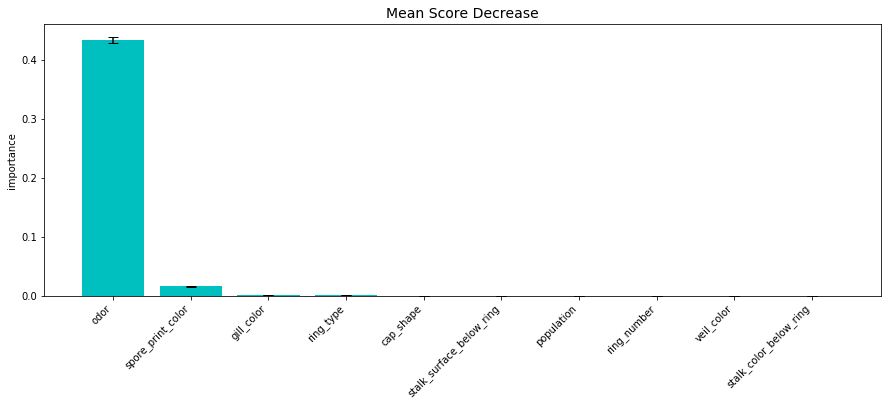

In [20]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

In [22]:
# Only with Odor
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ["odor", "spore_print_color"]),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=5, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s


{'algo__C': 0.17670169402947963, 'algo__fit_intercept': True}
0.9932297276504077 0.9932294664534849 0.9975384615384615


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.9s finished


# Evaluation

In [23]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

In [24]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



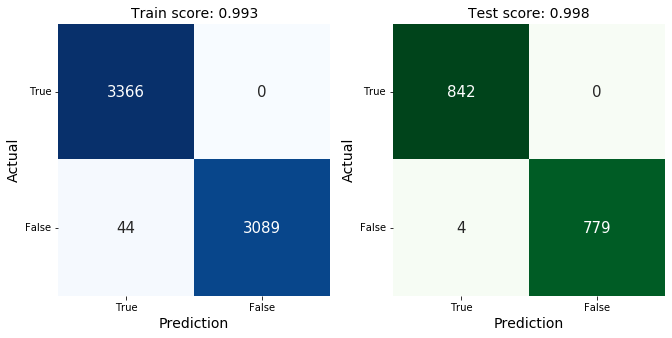

In [26]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

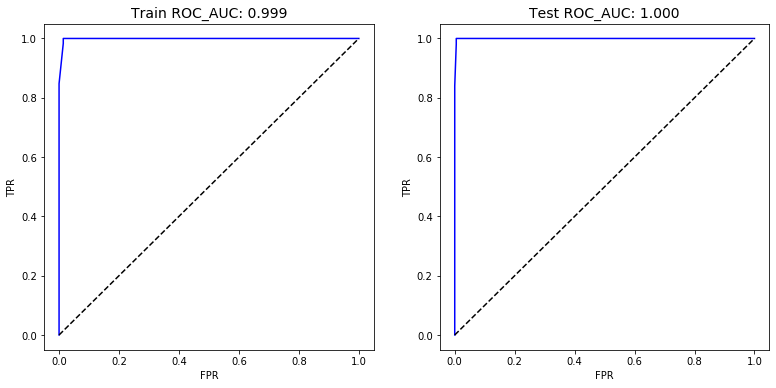

In [28]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

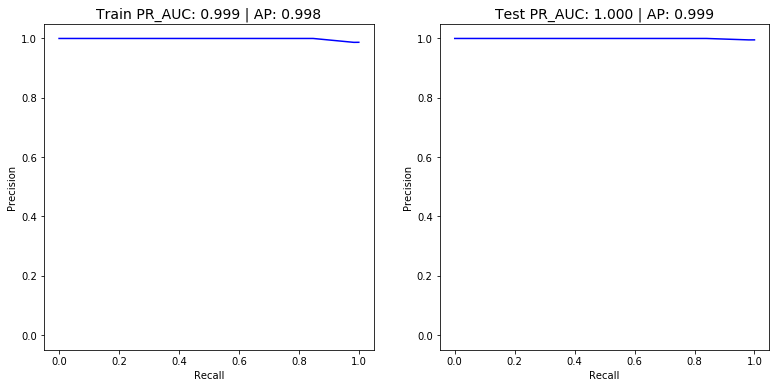

In [29]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Visualisasi

In [30]:
import seaborn as sns

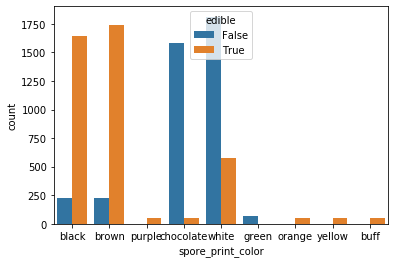

In [33]:
sns.countplot("spore_print_color",data=df, hue="edible")